In [82]:
from PIL import Image
import os 

# img show

def img_show(dir_path, idx):
    file_list = os.listdir(dir_path)
    img = Image.open(dir_path+file_list[idx])
    img = img.resize((300, 300))
    img.show()

from sklearn.model_selection import StratifiedKFold

# fold split 

def make_stfDataset(df, label_name, fold, seed, save_path):
    '''
    df: 데이터프레임
    label_name: 정답 레이블
    fold: fold 개수
    save_path: fold 나눠진 데이터셋 저장 장소
    '''
    col_list = df.columns.values
    feature_columns = [ col for col in col_list if col != label_name]
    
    stf = StratifiedKFold(n_splits=fold, random_state= seed, shuffle=True)
    df['fold'] = -1
    for i, (train_idx, valid_idx) in enumerate(stf.split(df[feature_columns], df[label_name])):
        df.loc[valid_idx, 'fold'] = i

    df['fold'] = df['fold'].astype(int)
    df.to_csv(save_path+'train_fold.csv', index = False)


# fold 별로 데이터셋 나누기 
    
def train_val_split(df, val_fold_idx):
    
    train_idx = df[df['fold'] != val_fold_idx].index
    val_idx = df[df['fold'] == val_fold_idx].index
    train_df = df.loc[train_idx]
    val_df = df.loc[val_idx]
    train_df.reset_index(drop= True, inplace= True)
    val_df.reset_index(drop= True, inplace= True)
    
    return train_df, val_df 


from torch.utils.data import Dataset
from PIL import Image

class NoisebirdDataset(Dataset):

    def __init__(self, img_path_lsit, label_lsit, transforms):
        self.img_path = img_path_lsit
        self.label_list = label_lsit
        self.transforms = transforms

    def _len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img = Image.open(self.img_path[index])
        label = self.label_list[index]
        
        if self.transforms is not None:
            img = self.transforms(img)
        
        return img, label 

In [19]:
train_data_dir = '../Dataset/train/'
unscale_data_dir = '../Dataset/unscale_train'

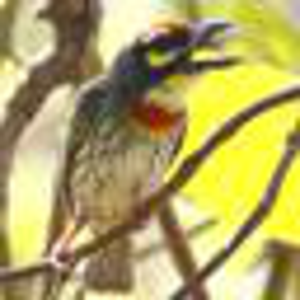

In [20]:
img_show(train_data_dir, 5)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv('/home/workspace/DACON/Noisebird/Dataset/train.csv')

In [34]:
# bird 종 분포확인

<Axes: xlabel='label'>

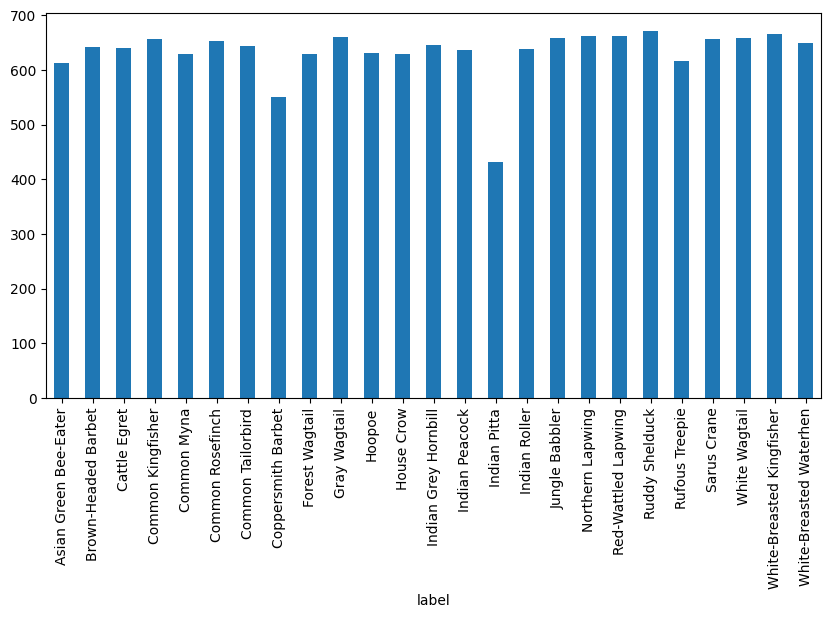

In [33]:
plt.figure(figsize=(10, 5))
train_df['label'].value_counts().sort_index().plot.bar()

In [35]:
train_df.head()

,img_path,upscale_img_path,label
0,./train/TRAIN_00000.jpg,./upscale_train/TRAIN_00000.png,Ruddy Shelduck
1,./train/TRAIN_00001.jpg,./upscale_train/TRAIN_00001.png,Gray Wagtail
2,./train/TRAIN_00002.jpg,./upscale_train/TRAIN_00002.png,Indian Peacock
3,./train/TRAIN_00003.jpg,./upscale_train/TRAIN_00003.png,Common Kingfisher
4,./train/TRAIN_00004.jpg,./upscale_train/TRAIN_00004.png,Common Kingfisher


In [84]:
# 판다스로 이미지를 읽어오는 것보다 pickle로 읽어오는게 더 빠르다. 
train_df = pd.read_csv('/home/workspace/DACON/Noisebird/Dataset/train.csv')
make_stfDataset(df=train_df, label_name= 'label', fold= 5, seed= 42, save_path= '../Dataset/')

In [85]:
train_df = pd.read_csv('/home/workspace/DACON/Noisebird/Dataset/train_fold.csv')

In [86]:
id = train_df[train_df['fold'] == 4].index
t = train_df.loc[id]

In [88]:
# 보통 이건 Dataset 정의 밖에서 해버림 
# train_idx = self.df[self.df['fold'] != self.val_fold_idx].index
# val_idx = self.df[self.df['fold'] == self.val_fold_idx].index
# train_df = self.df.loc[train_idx]
